# K-means para processamento de imagens

### Analise descritiva

Este projeto utiliza imagens como bases de dados, definindo seus pixels como cada linha e seus valores de R,G,B como cada coluna, qualquer imagem pode ser utilizada, o algoritimo K-Means sera utilizado para diminuir a quantidade de cores da imagem comprimindo-a, gerando uma imagem que ocupe menos espaço em disco.

O algoritimo K-Means pode ser treinado em uma imagem e utilizado para predizer a coloração de uma outra, gerando resultados interessantes que serão explorados ao longo do projeto em busca de possiveis aplicações para esse processamento.

#### Fonte dos dados:
Todas as imagens utilizadas para o processamento foram coletadas diretamente do Google images.

* chun.jpg: https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/most-beautiful-nature-landscape-by-elvin-siew-chun-wai-elvin-siew-chun-wai.jpg
* spring.jpg: http://clustertwoawfive.club/wp-content/uploads/2018/05/natural-nature-beauty-image-gallery-of-photos-beautiful-wallpaper-desktop-images.jpg
* waterfall.jpg: http://rosarotezeilen.com/wp-content/uploads/2018/08/1203847-impressive-beatiful-nature-4.jpg
* road.jpg: https://i.pinimg.com/originals/fd/cd/e0/fdcde0c504f2607137aca7dcd8c0028b.jpg
* meadow.jpg: http://elak.info/wp-content/uploads/2018/08/nice-meadow-field-summer-flowers-sky-nature-beautiful-blue-sun-floral-lovely-best-wallpapers-unique-flower-field-sunset-1-sun-amp-moon-pinterest-of-nice-meadow-field-summer-flowers-sky-natur.jpg
* bridge.jpg: https://thewallpaper.co/wp-content/uploads/2017/09/autumn-hd-landscape-wallpapers-beauty-tree-bridge-tablet-fresh-mobile-wallpapers-nature-lake-landscapedownload-leaves.jpg
* river.jpg: https://wallpaper-house.com/data/out/12/wallpaper2you_514707.jpg
* brasov.jpg: https://romaniatourstore.com/wp-content/uploads/2016/03/Brasov-old-town-1.jpg
* mountains.jpg: https://avatars.mds.yandex.net/get-pdb/368827/58dc1474-141d-4458-b4d6-b8709c394168/orig

#### Caracteristicas gerais:

* **Numero de registros:** As imagens utilizadas no projeto possuem resolução de 1920x1080, portanto 2073600 registros.

* **Quantidade de variaveis:** 3

* **Dicionario de dados:**
    * **R:** Valor da cor vermelha naquele pixel
    * **G:** Valor da cor verde naquele pixel
    * **B:** Valor da cor azul naquele pixel
   
* **Quantidade de valores ausentes por variavel:**
    * **R:** N/A
    * **G:** N/A
    * **B:** N/A
    
    
#### Analise descritiva das variaveis:

* **Dominio**: [0,255]
* **Medidas de tendencia:** (Variam de acordo com a imagem)
    * **Media:** 
        * **Treino:** 104.142898
        * **Teste:** 100.684498
    * **Mediana:** 
        * **Treino:** 95.0
        * **Teste:** 87.0
    * **Moda:**
        * **Treino:** 0
        * **Teste:** 0
* **Medidas de dispercao:** (Variam de acordo com a imagem)
    * **Treino:** 63.841369
    * **Teste:** 70.703759

## 1. Bibliotecas
* **numpy:** Manipulação de dados
* **scipy:** Gerar moda
* **pyplot:** Para construção de graficos
* **mplot3d:** Para construção de graficos em 3 dimensões
* **sklearn:** Para utilizar o K-Means
* **warnings:** Desabilitar avisos do numpy

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MiniBatchKMeans
import warnings; warnings.simplefilter('ignore')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Os marcadores **%matplotlib** e **%%javascript** definem apenas opções de visualização de output do jupyter-notebook.

## 2. Funções
* **get_colors:** Retorna um array de pixels com valores para de 0 a 1
* **plot_pixels:** Cria graficos para as cores das imagens
* **get_mmm:** Retorna uma tupla contento media, mediana e moda

In [3]:
def get_colors(data):
    shape_x, shape_y, shape_z = data.shape
    data_scale = data / 255.0 # use 0...1 scale
    return data_scale.reshape(shape_x * shape_y, shape_z)

def plot_pixels(data, title, colors=None, N=10000, fig=None, plot=(1,1,1)):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    if fig is None:
        fig=plt.figure(figsize=(20,20))
    ax = fig.add_subplot(*plot,projection='3d')
    ax.scatter3D(R, G, B, color=colors, marker='.')
    ax.set(xlabel='Red', ylabel='Green', zlabel='Blue', xlim=(0, 1), ylim=(0, 1), title=title)
    
def get_mmm(data):
    return (np.mean(data), np.median(data), stats.mode(data, axis=None))

## 3. Carregamento de imagens
Carrega imagens a serem avaliadas.

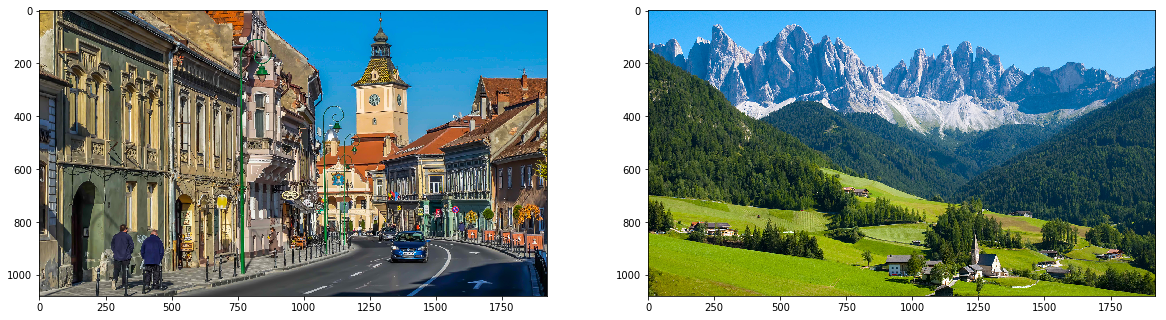

In [4]:
img1_file = 'brasov.jpg'
img2_file = 'mountains.jpg'

img1 = plt.imread('images/'+img1_file)
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.imshow(img1);

img2 = plt.imread('images/'+img2_file)
ax = fig.add_subplot(122)
ax.imshow(img2);

## 4. Medidas de tendencia central
Adquire valores de media, mediana, moda e desvio padrão.

In [5]:
mean1, median1, modal1 = get_mmm(img1)
print('IMG1> Mean: '+str(mean1)+'    Median:'+str(median1)+'    Modal:'+str(modal1.mode)+'    STD:'+str(np.std(img1)))

mean2, median2, modal2 = get_mmm(img2)
print('IMG2> Mean: '+str(mean2)+'    Median:'+str(median2)+'    Modal:'+str(modal2.mode)+'    STD:'+str(np.std(img2)))

IMG1> Mean: 104.14289801954733    Median:95.0    Modal:[0]    STD:63.84136953139135
IMG2> Mean: 100.68449813528807    Median:87.0    Modal:[0]    STD:70.70375933990402


## 5. Processamento
Nesta etapa sera processada a primeira imagem para treino do algoritimo K-Means em seguida utilizaremos o algoritimo treinado para predizer as versões com cores reduzidas da segunda imagem.

### 5.1. Agrupamento de cores
Nesta erapa executamos o algoritimo K-Means sobre a primeira imagem, para valores diferentes de clusters (16, 8, 4, 2) e testamos este resultado na segunda imagem.

In [6]:
# Original
img1_colors = get_colors(img1)
img2_colors = get_colors(img2)

In [7]:
# 16 Colors
img1_kmeans_16 = MiniBatchKMeans(16)
img1_kmeans_16.fit(img1_colors)
img1_16_colors = img1_kmeans_16.cluster_centers_[img1_kmeans_16.predict(img1_colors)]
img2_16_colors = img1_kmeans_16.cluster_centers_[img1_kmeans_16.predict(img2_colors)]

In [8]:
# 8 Colors
img1_kmeans_8 = MiniBatchKMeans(8)
img1_kmeans_8.fit(img1_colors)
img1_8_colors = img1_kmeans_8.cluster_centers_[img1_kmeans_8.predict(img1_colors)]
img2_8_colors = img1_kmeans_8.cluster_centers_[img1_kmeans_8.predict(img2_colors)]

In [9]:
# 4 Colors
img1_kmeans_4 = MiniBatchKMeans(4)
img1_kmeans_4.fit(img1_colors)
img1_4_colors = img1_kmeans_4.cluster_centers_[img1_kmeans_4.predict(img1_colors)]
img2_4_colors = img1_kmeans_4.cluster_centers_[img1_kmeans_4.predict(img2_colors)]

In [10]:
# 2 Colors
img1_kmeans_2 = MiniBatchKMeans(2)
img1_kmeans_2.fit(img1_colors)
img1_2_colors = img1_kmeans_2.cluster_centers_[img1_kmeans_2.predict(img1_colors)]
img2_2_colors = img1_kmeans_2.cluster_centers_[img1_kmeans_2.predict(img2_colors)]

### 5.2. Graficos de resultados
Nesta etapa produzimos graficos sobre os resultados obtidos para o treino e teste do algoritimo K-Means.

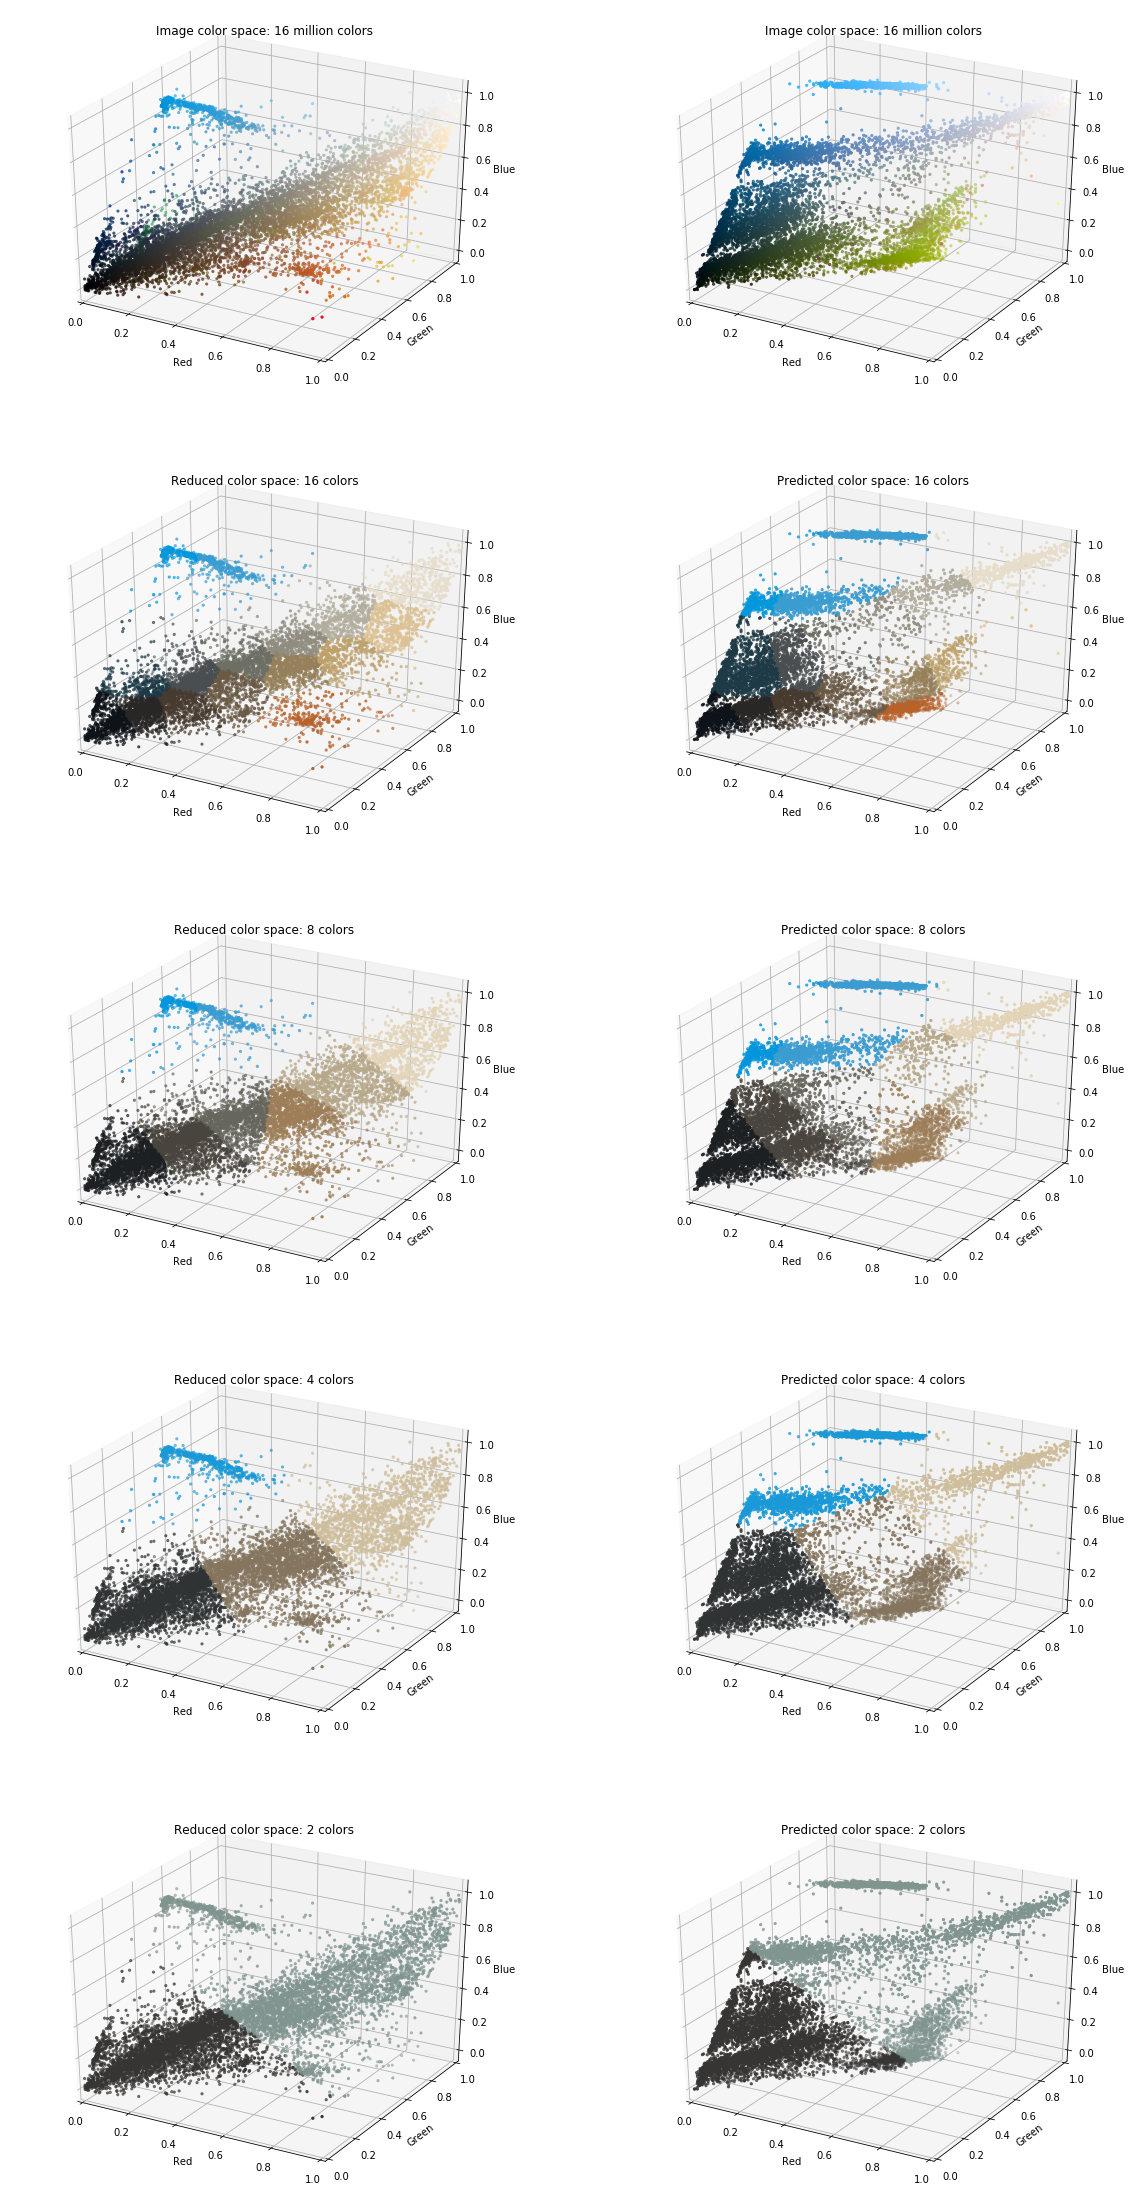

In [11]:
fig=plt.figure(figsize=(20,40))

# Original
plot_pixels(img1_colors, title='Image color space: 16 million colors', fig=fig, plot=(5,2,1))
plot_pixels(img2_colors, title='Image color space: 16 million colors', fig=fig, plot=(5,2,2))

# 16 Colors
plot_pixels(img1_colors, colors=img1_16_colors,title="Reduced color space: 16 colors", fig=fig, plot=(5,2,3))
plot_pixels(img2_colors, colors=img2_16_colors,title="Predicted color space: 16 colors", fig=fig, plot=(5,2,4))

# 8 Colors
plot_pixels(img1_colors, colors=img1_8_colors,title="Reduced color space: 8 colors", fig=fig, plot=(5,2,5))
plot_pixels(img2_colors, colors=img2_8_colors,title="Predicted color space: 8 colors", fig=fig, plot=(5,2,6))

# 4 Colors
plot_pixels(img1_colors, colors=img1_4_colors,title="Reduced color space: 4 colors", fig=fig, plot=(5,2,7))
plot_pixels(img2_colors, colors=img2_4_colors,title="Predicted color space: 4 colors", fig=fig, plot=(5,2,8))

# 2 Colors
plot_pixels(img1_colors, colors=img1_2_colors,title="Reduced color space: 2 colors", fig=fig, plot=(5,2,9))
plot_pixels(img2_colors, colors=img2_2_colors,title="Predicted color space: 2 colors", fig=fig, plot=(5,2,10))

### 5.3. Resultados em imagem
Nesta etapa transformamos o array de cores da imagem de volta no formato de imagem.

In [12]:
# 16 Colors
img1_16 = img1_16_colors.reshape(img1.shape)
img2_16 = img2_16_colors.reshape(img2.shape)

# 8 Colors
img1_8 = img1_8_colors.reshape(img1.shape)
img2_8 = img2_8_colors.reshape(img2.shape)

# 4 Colors
img1_4 = img1_4_colors.reshape(img1.shape)
img2_4 = img2_4_colors.reshape(img2.shape)

# 2 Colors
img1_2 = img1_2_colors.reshape(img1.shape)
img2_2 = img2_2_colors.reshape(img2.shape)

### 5.4. Imagens preditas
Nesta etapa comparamos as imagens preditas pelo teste com as imagens obtidas durante o treino.

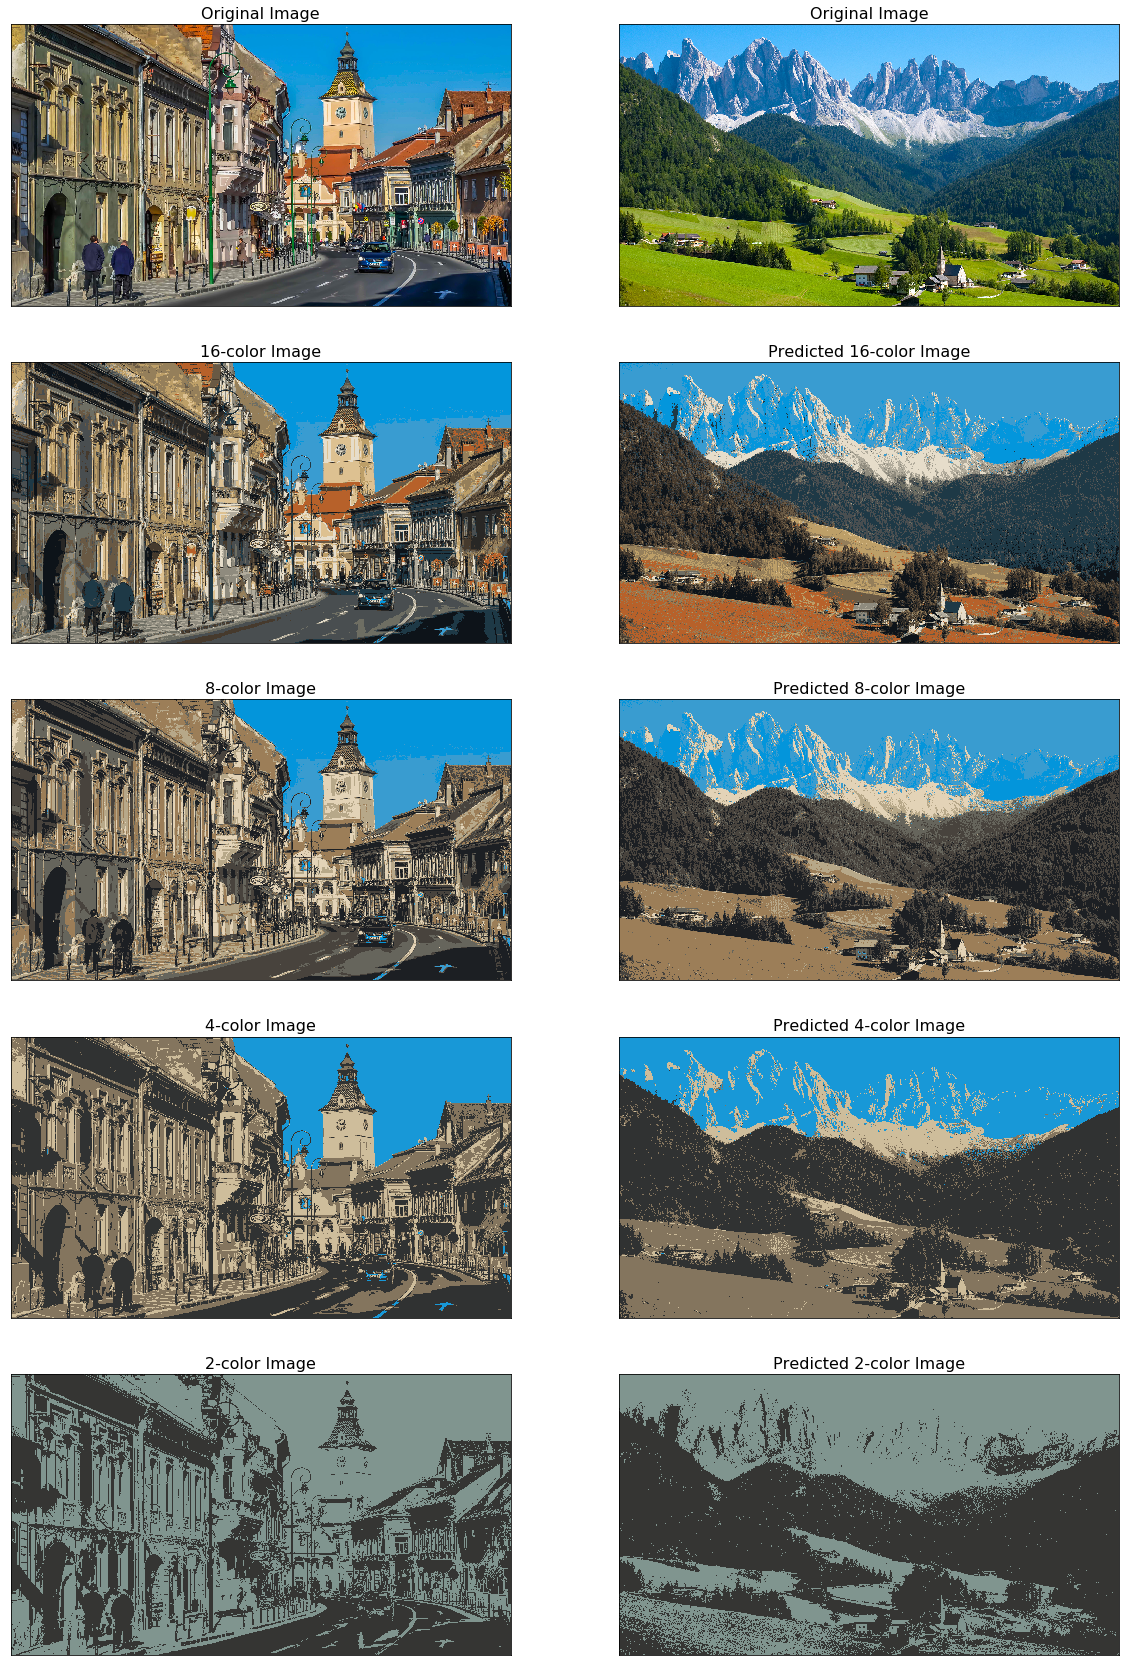

In [13]:
fig, ax = plt.subplots(5, 2, figsize=(20, 30),subplot_kw=dict(xticks=[], yticks=[]))

# Original
ax[0][0].set_title('Original Image', size=16)
ax[0][0].imshow(img1)
ax[0][1].set_title('Original Image', size=16)
ax[0][1].imshow(img2)

# 16 Colors
ax[1][0].set_title('16-color Image', size=16)
ax[1][0].imshow(img1_16)
ax[1][1].set_title('Predicted 16-color Image', size=16)
ax[1][1].imshow(img2_16)

# 8 Colors
ax[2][0].set_title('8-color Image', size=16)
ax[2][0].imshow(img1_8)
ax[2][1].set_title('Predicted 8-color Image', size=16)
ax[2][1].imshow(img2_8)

# 4 Colors
ax[3][0].set_title('4-color Image', size=16)
ax[3][0].imshow(img1_4)
ax[3][1].set_title('Predicted 4-color Image', size=16)
ax[3][1].imshow(img2_4)

# 2 Colors
ax[4][0].set_title('2-color Image', size=16)
ax[4][0].imshow(img1_2)
ax[4][1].set_title('Predicted 2-color Image', size=16)
ax[4][1].imshow(img2_2)

### 5.5. Validação de resultados
Nesta etapa comparamos a clusterização da segunda imagem a partir do treino com a primeira imagem e com o treino sobre si mesma, assim podemos comparar os resultados que foram gerados com as que eram esperados.

In [14]:
# 16 Colors
img2_kmeans_16 = MiniBatchKMeans(16)
img2_kmeans_16.fit(img2_colors)
img2_16_colors_fixed = img2_kmeans_16.cluster_centers_[img2_kmeans_16.predict(img2_colors)]

In [15]:
# 8 Colors
img2_kmeans_8 = MiniBatchKMeans(8)
img2_kmeans_8.fit(img2_colors)
img2_8_colors_fixed = img2_kmeans_8.cluster_centers_[img2_kmeans_8.predict(img2_colors)]

In [16]:
# 4 Colors
img2_kmeans_4 = MiniBatchKMeans(4)
img2_kmeans_4.fit(img2_colors)
img2_4_colors_fixed = img2_kmeans_4.cluster_centers_[img2_kmeans_4.predict(img2_colors)]

In [17]:
# 2 Colors
img2_kmeans_2 = MiniBatchKMeans(2)
img2_kmeans_2.fit(img2_colors)
img2_2_colors_fixed = img2_kmeans_2.cluster_centers_[img2_kmeans_2.predict(img2_colors)]

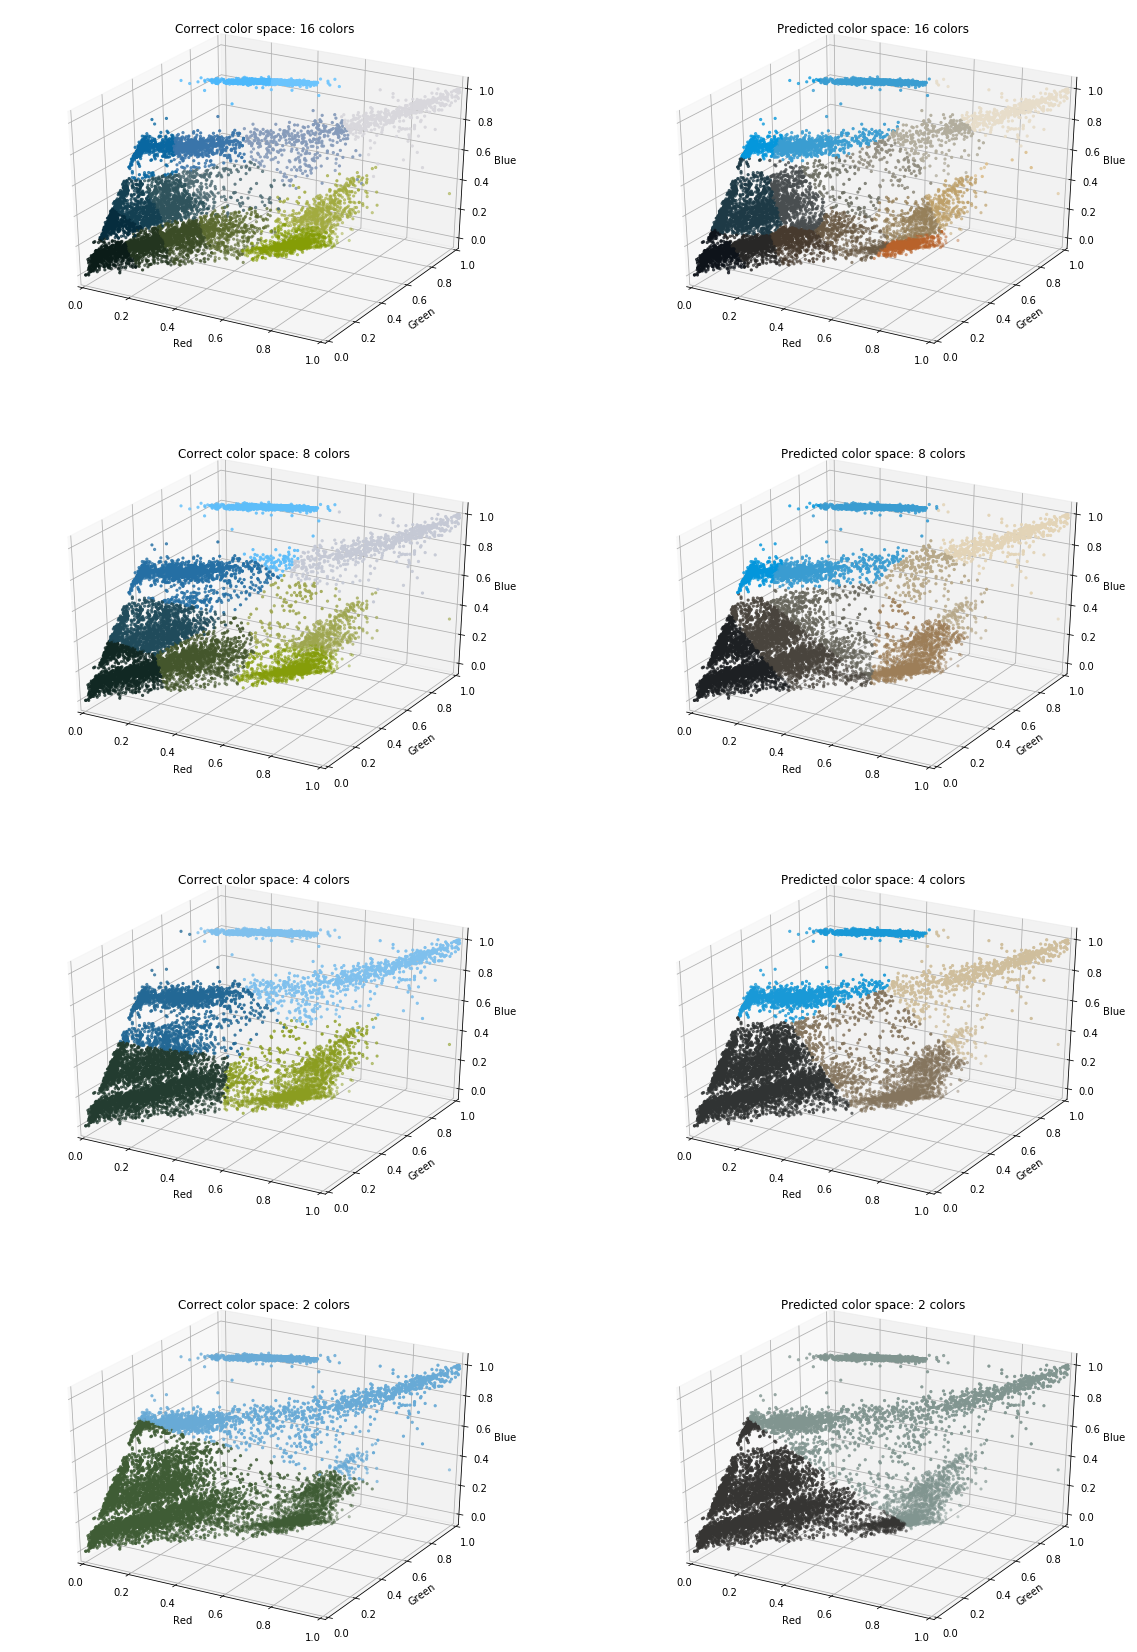

In [18]:
fig=plt.figure(figsize=(20,30))

# 16 Colors
plot_pixels(img2_colors, colors=img2_16_colors_fixed,title="Correct color space: 16 colors", fig=fig, plot=(4,2,1))
plot_pixels(img2_colors, colors=img2_16_colors,title="Predicted color space: 16 colors", fig=fig, plot=(4,2,2))

# 8 Colors
plot_pixels(img2_colors, colors=img2_8_colors_fixed,title="Correct color space: 8 colors", fig=fig, plot=(4,2,3))
plot_pixels(img2_colors, colors=img2_8_colors,title="Predicted color space: 8 colors", fig=fig, plot=(4,2,4))

# 4 Colors
plot_pixels(img2_colors, colors=img2_4_colors_fixed,title="Correct color space: 4 colors", fig=fig, plot=(4,2,5))
plot_pixels(img2_colors, colors=img2_4_colors,title="Predicted color space: 4 colors", fig=fig, plot=(4,2,6))

# 2 Colors
plot_pixels(img2_colors, colors=img2_2_colors_fixed,title="Correct color space: 2 colors", fig=fig, plot=(4,2,7))
plot_pixels(img2_colors, colors=img2_2_colors,title="Predicted color space: 2 colors", fig=fig, plot=(4,2,8))

### 5.6. Comparação de imagens
Nesta etapa representamos os valores dos graficos da etapa 5.5. em forma de imagem para melhor visualização.

In [19]:
# 16 Colors
img2_16_fixed = img2_16_colors_fixed.reshape(img2.shape)

# 8 Colors
img2_8_fixed = img2_8_colors_fixed.reshape(img2.shape)

# 4 Colors
img2_4_fixed = img2_4_colors_fixed.reshape(img2.shape)

# 2 Colors
img2_2_fixed = img2_2_colors_fixed.reshape(img2.shape)

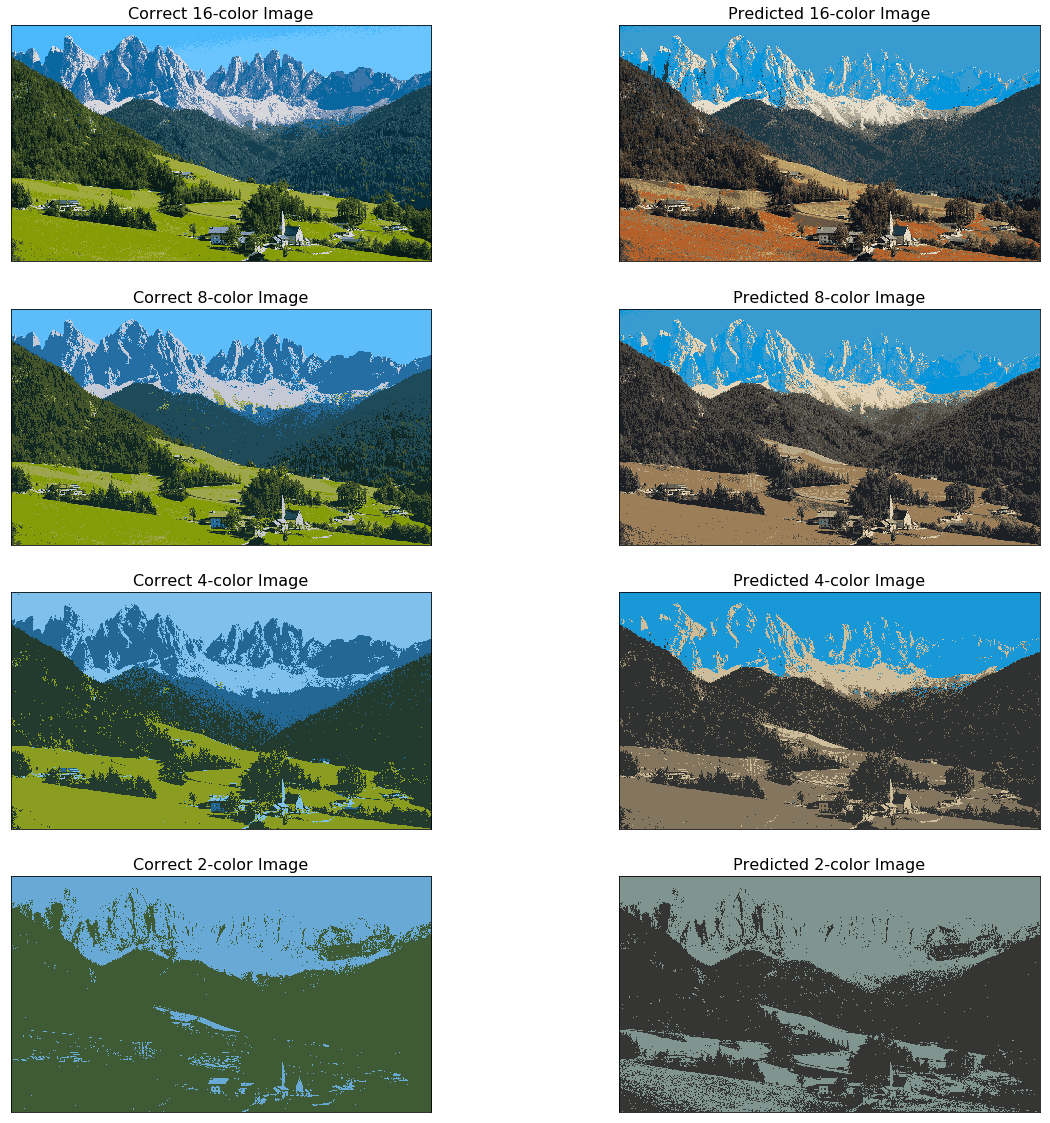

In [20]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20),subplot_kw=dict(xticks=[], yticks=[]))

# 16 Colors
ax[0][0].set_title('Correct 16-color Image', size=16)
ax[0][0].imshow(img2_16_fixed)
ax[0][1].set_title('Predicted 16-color Image', size=16)
ax[0][1].imshow(img2_16)

# 8 Colors
ax[1][0].set_title('Correct 8-color Image', size=16)
ax[1][0].imshow(img2_8_fixed)
ax[1][1].set_title('Predicted 8-color Image', size=16)
ax[1][1].imshow(img2_8)

# 4 Colors
ax[2][0].set_title('Correct 4-color Image', size=16)
ax[2][0].imshow(img2_4_fixed)
ax[2][1].set_title('Predicted 4-color Image', size=16)
ax[2][1].imshow(img2_4)

# 2 Colors
ax[3][0].set_title('Correct 2-color Image', size=16)
ax[3][0].imshow(img2_2_fixed)
ax[3][1].set_title('Predicted 2-color Image', size=16)
ax[3][1].imshow(img2_2)

## 6. Conclusão sobre resultados obtidos até então...
Ao executar o algoritimo K-Means sobre os pixels de uma imagem separamos em clusters os pixels de acordo com as suas cores, dessa maneira podemos definir a todos os membros de um cluster um so valor de R, G, B, reduzindo o numero de cores na imagem, tornando menor o espaço necessario para armazenamento.

Ao treinar o algoritimo com uma imagem e aplica-lo em outra nota-se que as cores da imagem que treinou o algoritimo são aplicadas sobre as cores da segunda imagem efetivemante substituindo sua paleta de cores pela paleta de cores da primeira. 
O algoritimo tenta predizer qual seria as cores da forma reduzida da segunda imagem utilizando cores geradas a partir da primeira, a cor mais proxima da sua paleta de cores sera aplicada no lugar da cor da segunda imagem.

Se compararmos a quantidade de detalhes apresentados na segunda imagem quando gerada a partir de sua propria paleta e quando gerada a partir da paleta da primeira imagem, notamos que ambas evidenciam diferentes detalhes e bordas na imagem.

Futuramente pretendo treinar o algoritimo com um maior numero de imagens e fazer associações com os resultados obtidos, pretendo encontrar padrões de cores em certas categorias de imagens e combinar os resultados de diferentes paletas aplicadas a uma imagem para evidenciar atributos da imagem. Vou explorar outras ideias com o desenrolar do projeto, espero encontrar ainda mais possiveis associações para serem feitas com os dados obtidos.